# EDA: Titanic Dataset

Who lives and who dies?

In [1]:
# this cell is needed in Colab
!pip install seaborn pandas -U

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.9.0)
Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (0.24.2)


In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [3]:
import keras

DATA_URL = "https://s3-ap-southeast-1.amazonaws.com/deeplearning-mat/titanic.csv"
DATA_DIR = keras.utils.get_file("titanic.csv", DATA_URL, cache_subdir='datasets', extract=True)

print("Dataset present at:", DATA_DIR)

Using TensorFlow backend.


Dataset present at: /home/jovyan/.keras/datasets/titanic.csv


In [4]:
# use Pandas to load the csv file
df = pd.read_csv(DATA_DIR)

# look at the top few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Search for Missing Data

We will want to correct them

In [5]:
df.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [6]:
for col in df.columns:
    col_has_null = df[col].isnull().values.any()
    print("Column", col, "has null value is:", col_has_null)

Column PassengerId has null value is: False
Column Survived has null value is: False
Column Pclass has null value is: False
Column Name has null value is: False
Column Sex has null value is: False
Column Age has null value is: True
Column SibSp has null value is: False
Column Parch has null value is: False
Column Ticket has null value is: False
Column Fare has null value is: False
Column Cabin has null value is: True
Column Embarked has null value is: True


In [7]:
# fill missing ages/fares with mean value

df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

# fill cabin and embarked with "unknown" category

df["Cabin"].fillna("<UNK>", inplace=True)
df["Embarked"].fillna("<UNK>", inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival ratio: 0.3838383838383838


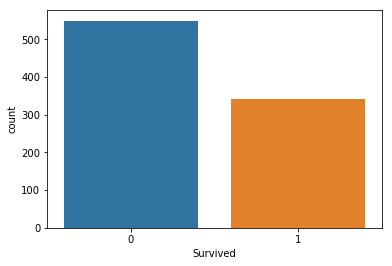

In [10]:
ratio = df.Survived.sum()/df.Survived.count()
print("Survival ratio:", ratio)

seaborn.countplot(x='Survived', data=df);

### Let's guess: more females survived?

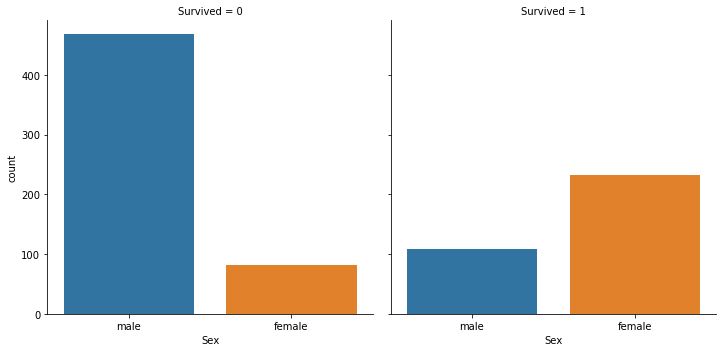

In [11]:
seaborn.catplot(x='Sex', col='Survived', kind='count', data=df);